# Clusterização utilizando K-Means, DBSCAN e Hierarchical - Base de Dados Pessoa Física 

In [23]:
#importando biblotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import (
    KMeans, DBSCAN
)
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

In [2]:
df_pf = pd.read_csv('../dados/PF_tratados.csv')
df_pf.head()

ID Cliente Linha de Ação                      Produto GPOM Data de Venda  \
0       56943      EDUCACAO    COLEGIO SESI NOVO ENSINO MEDIO    2022-10-28   
1       19906      EDUCACAO                 EDUCACAO INFANTIL    2023-01-13   
2       19906      EDUCACAO  ENSINO FUNDAMENTAL INTERNACIONAL    2021-10-07   
3       19906      EDUCACAO  ENSINO FUNDAMENTAL INTERNACIONAL    2023-01-13   
4        6940      EDUCACAO        COLEGIO SESI INTERNACIONAL    2021-10-14   

                   Classe de Serviço Data de Nascimento     Gênero    Cidade  \
0         ENSINO MEDIO – ITINERARIOS         2008-05-16  MASCULINO  CURITIBA   
1     EDUCACAO INFANTIL - PRE-ESCOLA         1981-08-13   FEMININO  CURITIBA   
2  ENSINO FUNDAMENTAL - 1º AO 5º ANO         1981-08-13   FEMININO  CURITIBA   
3  ENSINO FUNDAMENTAL - 1º AO 5º ANO         1981-08-13   FEMININO  CURITIBA   
4                       ENSINO MEDIO         2006-11-01   FEMININO  CURITIBA   

  Microrregião Estado Fim de Vigência Tipo Pessoa Área de Atuação  \
0     CURITIBA     PR      2023-12-15      FÍSICA   NÃO INFORMADO   
1     CURITIBA     PR      2023-12-25      FÍSICA   NÃO INFORMADO   
2     CURITIBA     PR      2022-12-14      FÍSICA   NÃO INFORMADO   
3     CURITIBA     PR      2023-12-25      FÍSICA   NÃO INFORMADO   
4     CURITIBA     PR      2022-12-14      FÍSICA   NÃO INFORMADO   

                     Área de Atuação e Produto GPOM  Idade  Tempo de Contrato  \
0    COLEGIO SESI NOVO ENSINO MEDIO / NÃO INFORMADO     14                413   
1                 EDUCACAO INFANTIL / NÃO INFORMADO     41                346   
2  ENSINO FUNDAMENTAL INTERNACIONAL / NÃO INFORMADO     40                433   
3  ENSINO FUNDAMENTAL INTERNACIONAL / NÃO INFORMADO     41                346   
4        COLEGIO SESI INTERNACIONAL / NÃO INFORMADO     14                426   

   Longitude   Latitude  
0 -49.264622 -25.419547  
1 -49.264622 -25.419547  
2 -49.264622 -25.419547  
3 -49.264622 -25.419547  
4 -49.264622 -25.419547

In [3]:
df_pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83872 entries, 0 to 83871
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID Cliente                      83872 non-null  int64  
 1   Linha de Ação                   83872 non-null  object 
 2   Produto GPOM                    83872 non-null  object 
 3   Data de Venda                   83872 non-null  object 
 4   Classe de Serviço               83872 non-null  object 
 5   Data de Nascimento              83872 non-null  object 
 6   Gênero                          83872 non-null  object 
 7   Cidade                          83872 non-null  object 
 8   Microrregião                    83872 non-null  object 
 9   Estado                          83872 non-null  object 
 10  Fim de Vigência                 83872 non-null  object 
 11  Tipo Pessoa                     83872 non-null  object 
 12  Área de Atuação                 

In [4]:
df_pf.describe()

ID Cliente         Idade  Tempo de Contrato     Longitude  \
count  83872.000000  83872.000000       83872.000000  83872.000000   
mean   50536.946168     24.114246         199.312572    -50.423982   
std    28783.428804     10.221776         156.797041      1.634769   
min        4.000000      0.000000        -666.000000    -70.772154   
25%    25930.000000     16.000000         139.000000    -51.462317   
50%    50901.500000     21.000000         166.000000    -49.307310   
75%    74989.000000     30.000000         221.000000    -49.264622   
max    99999.000000     78.000000       28282.000000    -34.864121   

           Latitude  
count  83872.000000  
mean     -24.960591  
std        1.042054  
min      -31.764898  
25%      -25.442949  
50%      -25.419547  
75%      -24.557891  
max        2.823842

In [5]:
# viewing descriptive df_pf
desc = pd.DataFrame(index=list(df_pf))
desc['count'] = df_pf.count()
desc['nunique'] = df_pf.nunique()
desc['%unique'] = df_pf.nunique() / len(df_pf) * 100
desc['null'] = df_pf.isnull().sum()
desc['type'] = df_pf.dtypes
desc = pd.concat([desc, df_pf.describe().T.drop('count', axis=1)], axis=1)
desc

count  nunique    %unique  null     type  \
ID Cliente                      83872    13888  16.558565     0    int64   
Linha de Ação                   83872        3   0.003577     0   object   
Produto GPOM                    83872       33   0.039346     0   object   
Data de Venda                   83872      892   1.063525     0   object   
Classe de Serviço               83872       42   0.050076     0   object   
Data de Nascimento              83872    13919  16.595527     0   object   
Gênero                          83872        2   0.002385     0   object   
Cidade                          83872      574   0.684376     0   object   
Microrregião                    83872       37   0.044115     0   object   
Estado                          83872       25   0.029807     0   object   
Fim de Vigência                 83872     1278   1.523750     0   object   
Tipo Pessoa                     83872        1   0.001192     0   object   
Área de Atuação                 83872       24   0.028615     0   object   
Área de Atuação e Produto GPOM  83872       97   0.115652     0   object   
Idade                           83872       79   0.094191     0    int64   
Tempo de Contrato               83872      932   1.111217     0    int64   
Longitude                       83872      577   0.687953     0  float64   
Latitude                        83872      576   0.686761     0  float64   

                                        mean           std         min  \
ID Cliente                      50536.946168  28783.428804    4.000000   
Linha de Ação                            NaN           NaN         NaN   
Produto GPOM                             NaN           NaN         NaN   
Data de Venda                            NaN           NaN         NaN   
Classe de Serviço                        NaN           NaN         NaN   
Data de Nascimento                       NaN           NaN         NaN   
Gênero                                   NaN           NaN         NaN   
Cidade                                   NaN           NaN         NaN   
Microrregião                             NaN           NaN         NaN   
Estado                                   NaN           NaN         NaN   
Fim de Vigência                          NaN           NaN         NaN   
Tipo Pessoa                              NaN           NaN         NaN   
Área de Atuação                          NaN           NaN         NaN   
Área de Atuação e Produto GPOM           NaN           NaN         NaN   
Idade                              24.114246     10.221776    0.000000   
Tempo de Contrato                 199.312572    156.797041 -666.000000   
Longitude                         -50.423982      1.634769  -70.772154   
Latitude                          -24.960591      1.042054  -31.764898   

                                         25%           50%           75%  \
ID Cliente                      25930.000000  50901.500000  74989.000000   
Linha de Ação                            NaN           NaN           NaN   
Produto GPOM                             NaN           NaN           NaN   
Data de Venda                            NaN           NaN           NaN   
Classe de Serviço                        NaN           NaN           NaN   
Data de Nascimento                       NaN           NaN           NaN   
Gênero                                   NaN           NaN           NaN   
Cidade                                   NaN           NaN           NaN   
Microrregião                             NaN           NaN           NaN   
Estado                                   NaN           NaN           NaN   
Fim de Vigência                          NaN           NaN           NaN   
Tipo Pessoa                              NaN           NaN           NaN   
Área de Atuação                          NaN           NaN           NaN   
Área de Atuação e Produto GPOM           NaN           NaN           NaN   
Idade                              16.00

## Pré-processamento

In [6]:
s = (df_pf.dtypes == 'object')
object_cols = list(s[s].index)

print("Variáveis categóricas na base de dados:", object_cols)



Variáveis categóricas na base de dados: ['Linha de Ação', 'Produto GPOM', 'Data de Venda', 'Classe de Serviço', 'Data de Nascimento', 'Gênero', 'Cidade', 'Microrregião', 'Estado', 'Fim de Vigência', 'Tipo Pessoa', 'Área de Atuação', 'Área de Atuação e Produto GPOM']


In [7]:


LE=LabelEncoder()
for i in object_cols:
    df_pf[i]=df_pf[[i]].apply(LE.fit_transform)



In [8]:
df_pf.head()

ID Cliente  Linha de Ação  Produto GPOM  Data de Venda  Classe de Serviço  \
0       56943              0            10            562                 15   
1       19906              0            17            626                  9   
2       19906              0            20            237                 12   
3       19906              0            20            626                 12   
4        6940              0             8            242                 14   

   Data de Nascimento  Gênero  Cidade  Microrregião  Estado  Fim de Vigência  \
0               12147       1     140            10      16              972   
1                3075       0     140            10      16              982   
2                3075       0     140            10      16              634   
3                3075       0     140            10      16              982   
4               11593       0     140            10      16              634   

   Tipo Pessoa  Área de Atuação  Área de Atuação e Produto GPOM  Idade  \
0            0               17                              40     14   
1            0               17                              47     41   
2            0               17                              50     40   
3            0               17                              50     41   
4            0               17                              38     14   

   Tempo de Contrato  Longitude   Latitude  
0                413 -49.264622 -25.419547  
1                346 -49.264622 -25.419547  
2                433 -49.264622 -25.419547  
3                346 -49.264622 -25.419547  
4                426 -49.264622 -25.419547

/home/ba/anaconda3/envs/senai-env/lib/python3.12/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


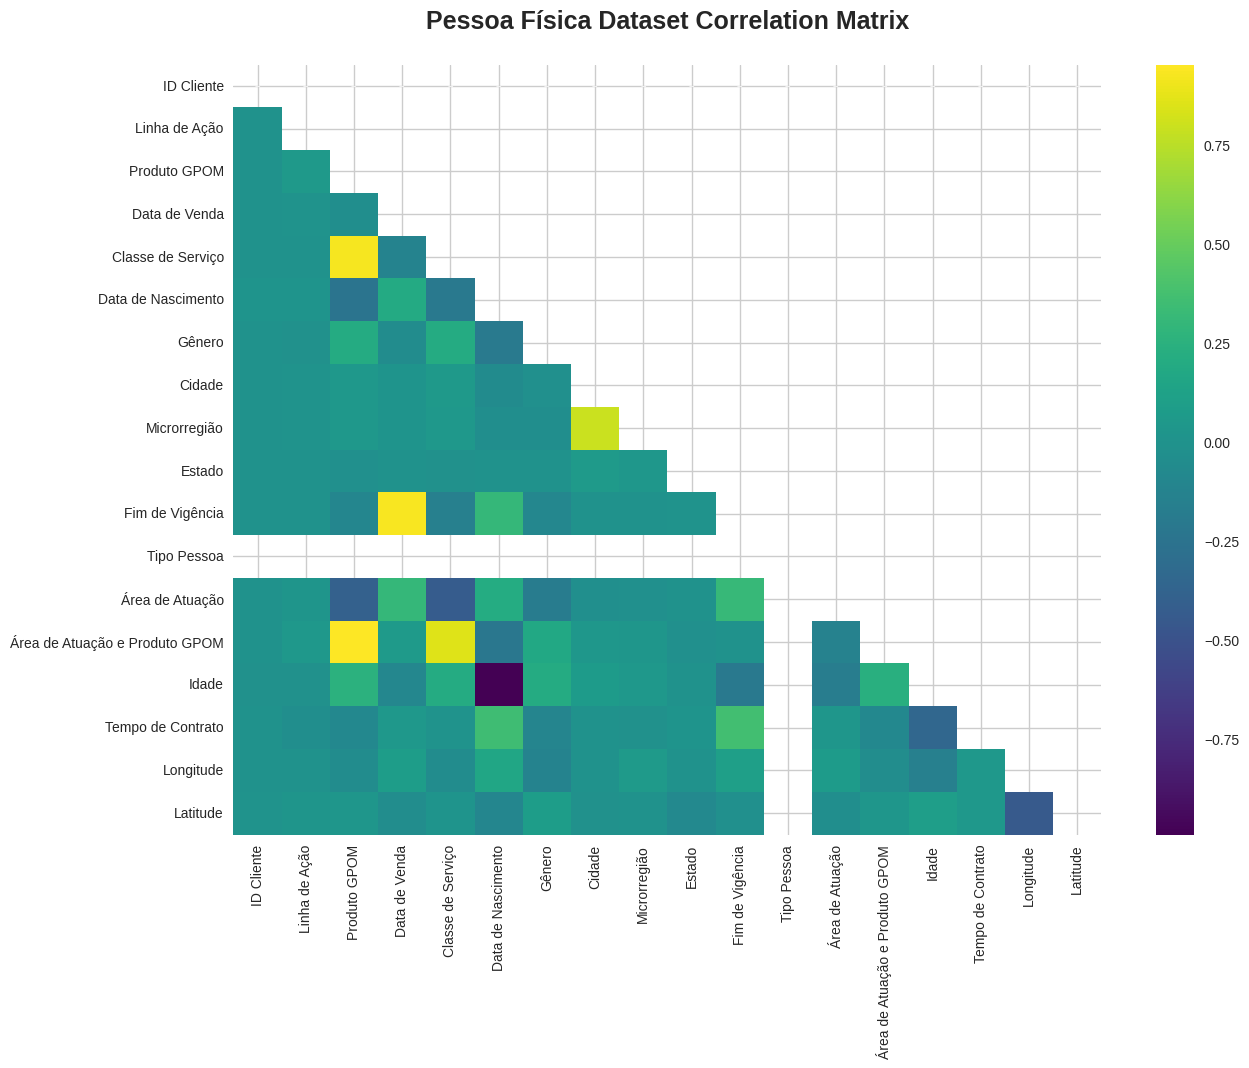

In [9]:


def heatmap(dataset, label = None):
    corr = dataset.corr(method = 'spearman')
    plt.figure(figsize = (14, 10), dpi = 100)
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corr, mask = mask, cmap = 'viridis', annot = True, annot_kws = {'size' : 7})
    plt.title(f'{label} Dataset Correlation Matrix\n', fontsize = 18, weight = 'bold')
    plt.show()
heatmap(df_pf, 'Pessoa Física')



In [10]:
df_pf.columns

Index(['ID Cliente', 'Linha de Ação', 'Produto GPOM', 'Data de Venda',
       'Classe de Serviço', 'Data de Nascimento', 'Gênero', 'Cidade',
       'Microrregião', 'Estado', 'Fim de Vigência', 'Tipo Pessoa',
       'Área de Atuação', 'Área de Atuação e Produto GPOM', 'Idade',
       'Tempo de Contrato', 'Longitude', 'Latitude'],
      dtype='object')

In [11]:
cols_del = ['Data de Venda', 'Data de Nascimento', 'Fim de Vigência', 'Tipo Pessoa','Longitude', 'Latitude']
df_pf = df_pf.drop(cols_del, axis=1)

/home/ba/anaconda3/envs/senai-env/lib/python3.12/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


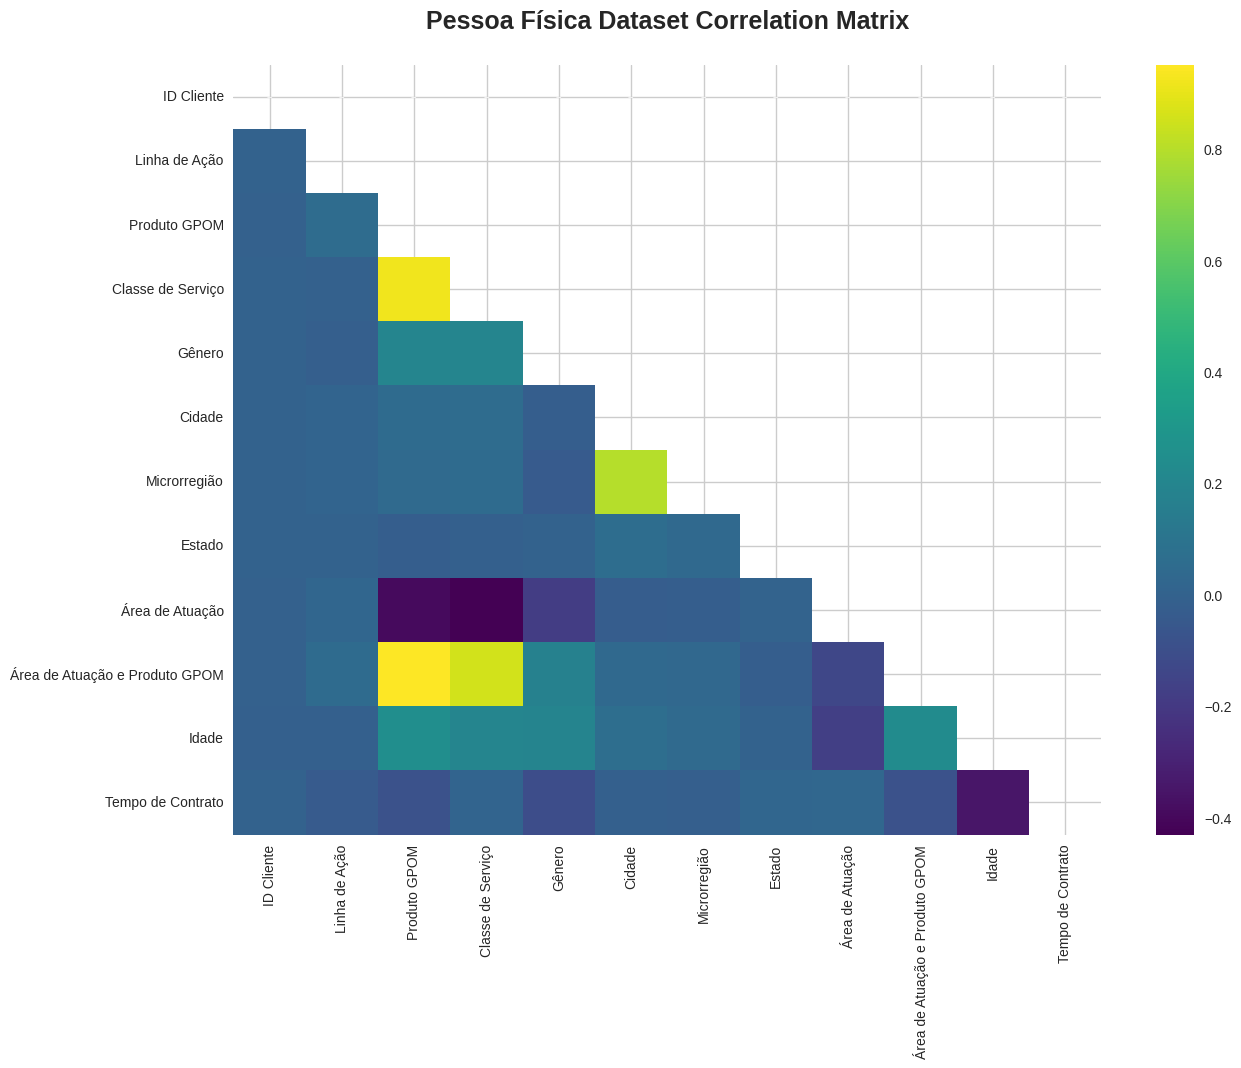

In [12]:


heatmap(df_pf, 'Pessoa Física')



## Normalização

In [13]:
scaler = StandardScaler()
scaler.fit(df_pf)
scaled_df_pf = pd.DataFrame(scaler.transform(df_pf),columns= df_pf.columns )
print("Todos os atributos estão normalizados")

Todos os atributos estão normalizados


In [14]:
scaled_df_pf

ID Cliente  Linha de Ação  Produto GPOM  Classe de Serviço    Gênero  \
0        0.222562      -0.042048     -1.093611          -0.826463  0.564903   
1       -1.064193      -0.042048     -0.423176          -1.272571 -1.770215   
2       -1.064193      -0.042048     -0.135847          -1.049517 -1.770215   
3       -1.064193      -0.042048     -0.135847          -1.049517 -1.770215   
4       -1.514663      -0.042048     -1.285164          -0.900815 -1.770215   
...           ...            ...           ...                ...       ...   
83867   -1.272578      -0.042048      0.821917           0.957968  0.564903   
83868    0.360038      -0.042048     -1.955598          -1.867382  0.564903   
83869   -1.719470      -0.042048     -1.955598          -1.867382  0.564903   
83870    0.674109      -0.042048     -1.955598          -1.867382  0.564903   
83871   -1.514316      -0.042048      0.821917           0.957968 -1.770215   

         Cidade  Microrregião    Estado  Área de Atuação  \
0     -0.744424     -0.689034 -0.052527         0.481202   
1     -0.744424     -0.689034 -0.052527         0.481202   
2     -0.744424     -0.689034 -0.052527         0.481202   
3     -0.744424     -0.689034 -0.052527         0.481202   
4     -0.744424     -0.689034 -0.052527         0.481202   
...         ...           ...       ...              ...   
83867 -1.348113      1.366747 -0.052527        -0.057083   
83868 -0.228773     -1.100190 -0.052527        -1.313082   
83869 -0.775866      0.338856  6.443449        -2.210224   
83870  0.299455      0.750012 -0.052527         1.019487   
83871  1.249007     -0.380667 -0.052527         1.557772   

       Área de Atuação e Produto GPOM     Idade  Tempo de Contrato  
0                           -1.018862 -0.989486           1.362836  
1                           -0.713991  1.651949           0.935530  
2                           -0.583332  1.554118           1.490391  
3                           -0.583332  1.651949           0.935530  
4                           -1.105968 -0.989486           1.445747  
...                               ...       ...                ...  
83867                        0.984575  1.651949          -0.148681  
83868                       -2.020580  0.477978          -1.201003  
83869                       -2.194792 -0.500331          -0.729052  
83870                       -1.454392  0.575809          -1.245647  
83871                        1.332999  2.043273          -1.271158  

[83872 rows x 12 columns]

In [15]:
pca = PCA(n_components=3)
pca.fit(scaled_df_pf)
PCA_df_pf = pd.DataFrame(pca.transform(scaled_df_pf))
PCA_df_pf.describe().T

count          mean       std       min       25%       50%       75%  \
0  83872.0  2.168768e-17  1.767016 -2.732285 -1.582996 -0.894835  1.786119   
1  83872.0  6.641853e-17  1.348550 -3.322100 -1.060835  0.487210  1.057834   
2  83872.0 -1.084384e-17  1.128979 -5.169160 -0.560786  0.063552  0.667324   

          max  
0   20.176989  
1    4.768096  
2  106.096511

## K-Means

### Método do cotovelo

Elbow Method to determine the number of clusters to be formed:


/home/ba/anaconda3/envs/senai-env/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ba/anaconda3/envs/senai-env/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ba/anaconda3/envs/senai-env/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/ba/anaconda3/envs/senai-env/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The 

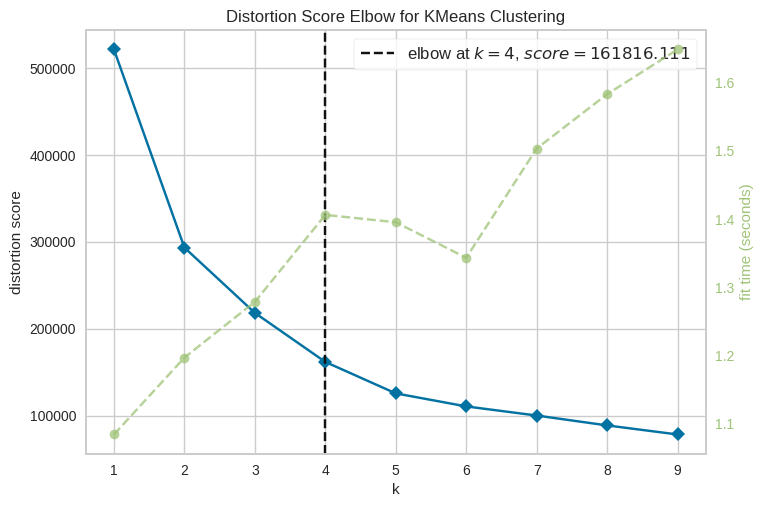

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=(1,10))
Elbow_M.fit(PCA_df_pf)
Elbow_M.show()

In [17]:
# Note: K-Means is a popular centroid-based clustering algorithm.
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(PCA_df_pf)
kmeans_score = silhouette_score(PCA_df_pf, kmeans_labels)

/home/ba/anaconda3/envs/senai-env/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [18]:
PCA_df_pf['Clusters_KMeans']= kmeans_labels
df_pf['Clusters_KMeans']=kmeans_labels

In [19]:
kmeans_labels

array([2, 2, 2, ..., 1, 1, 0], dtype=int32)

In [27]:

import plotly.graph_objects as go

x = PCA_df_pf[0]
y = PCA_df_pf[1]
z = PCA_df_pf[2]
c = PCA_df_pf['Clusters_KMeans']
fig = go.Figure()
scatter = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=6,
        color=c,
        colorscale='viridis',
        opacity=0.8
    ),
    name='Data Points'
)
fig.add_trace(scatter)
fig.update_layout(
    scene=dict(
        xaxis_title='Principal Component 1',
        yaxis_title='Principal Component 2',
        zaxis_title='Principal Component 3',
        camera=dict(
            eye=dict(x=1.5, y=1.5, z=1.5)
        )
    ),
    title='3D Scatter Plot of PCA-transformed Data'
)
fig.show()



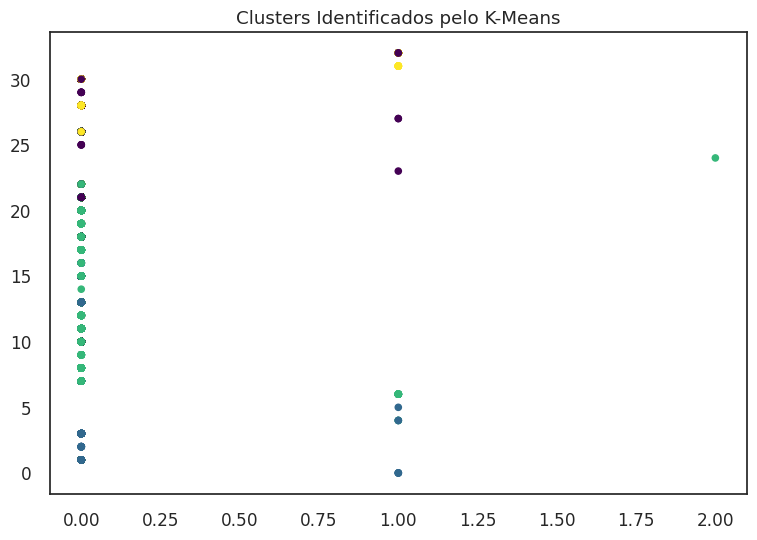

In [26]:
plt.scatter(df_pf['Linha de Ação'], df_pf['Produto GPOM'], c=df_pf['Clusters_KMeans'], cmap='viridis', s=20)
plt.title('Clusters Identificados pelo K-Means')
plt.show()